In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pickle
sns.set()

In [56]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [57]:
# Load the Calories dataset
df1 = pd.read_csv("D:\\ENGG\\6th sem\\project\\calories.csv")
print(df1.head())
print(df1.shape)

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
(15000, 2)


In [58]:
# Load the Exercise Dataset
df2 = pd.read_csv("D:\\ENGG\\6th sem\\project\\exercise.csv")
print(df2.head())
print(df2.shape)

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8
(15000, 8)


In [59]:
df = pd.concat([df2, df1["Calories"]], axis=1)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  

In [60]:
# Drop User_ID column because this is not required
df.drop(columns=["User_ID"], inplace=True)
print(df.head())
print(df.info())

   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    male   68   190.0    94.0      29.0       105.0       40.8     231.0
1  female   20   166.0    60.0      14.0        94.0       40.3      66.0
2    male   69   179.0    79.0       5.0        88.0       38.7      26.0
3  female   34   179.0    71.0      13.0       100.0       40.5      71.0
4  female   27   154.0    58.0      10.0        81.0       39.8      35.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1

In [61]:
# Fetching Categorical Data
cat_col = [col for col in df.columns if df[col].dtype == 'O']
print(cat_col)
print(df["Gender"].value_counts())

['Gender']
Gender
female    7553
male      7447
Name: count, dtype: int64


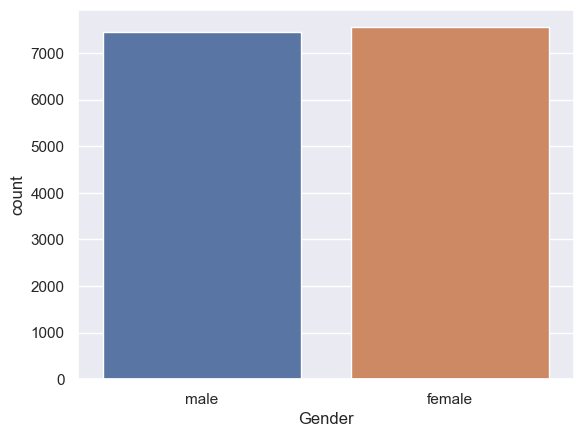

In [62]:
sns.countplot(x=df['Gender'])
plt.show()

In [63]:
categorical = pd.get_dummies(df[cat_col], drop_first=True)
print(categorical.head())

   Gender_male
0         True
1        False
2         True
3        False
4        False


In [64]:
num_col = [col for col in df.columns if df[col].dtype != 'O']
print(num_col)
print(df[num_col].shape)

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
(15000, 7)


In [65]:
numerical = df[num_col]
print(numerical.head())
print(numerical.shape)
plt.figure(figsize=(20, 15))
plotnumber = 1

   Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   68   190.0    94.0      29.0       105.0       40.8     231.0
1   20   166.0    60.0      14.0        94.0       40.3      66.0
2   69   179.0    79.0       5.0        88.0       38.7      26.0
3   34   179.0    71.0      13.0       100.0       40.5      71.0
4   27   154.0    58.0      10.0        81.0       39.8      35.0
(15000, 7)


<Figure size 2000x1500 with 0 Axes>

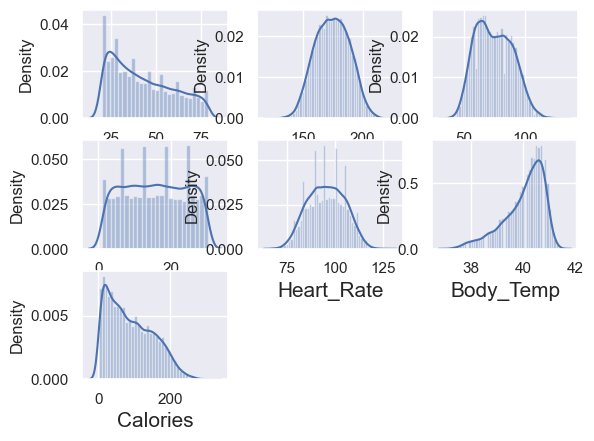

In [66]:
for column in numerical:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(numerical[column])
        plt.xlabel(column, fontsize=15)
    plotnumber += 1

plt.show()

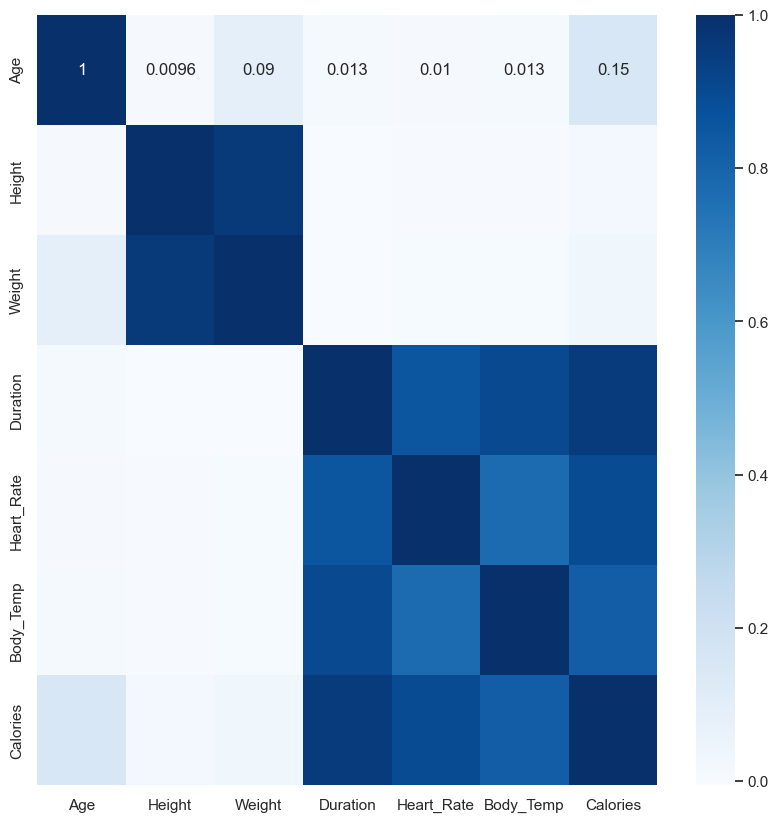

In [67]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(numerical.corr(), cmap='Blues', annot=True)
plt.show()


In [68]:
data = pd.concat([categorical, numerical], axis=1)
print(data.head())

   Gender_male  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0         True   68   190.0    94.0      29.0       105.0       40.8     231.0
1        False   20   166.0    60.0      14.0        94.0       40.3      66.0
2         True   69   179.0    79.0       5.0        88.0       38.7      26.0
3        False   34   179.0    71.0      13.0       100.0       40.5      71.0
4        False   27   154.0    58.0      10.0        81.0       39.8      35.0


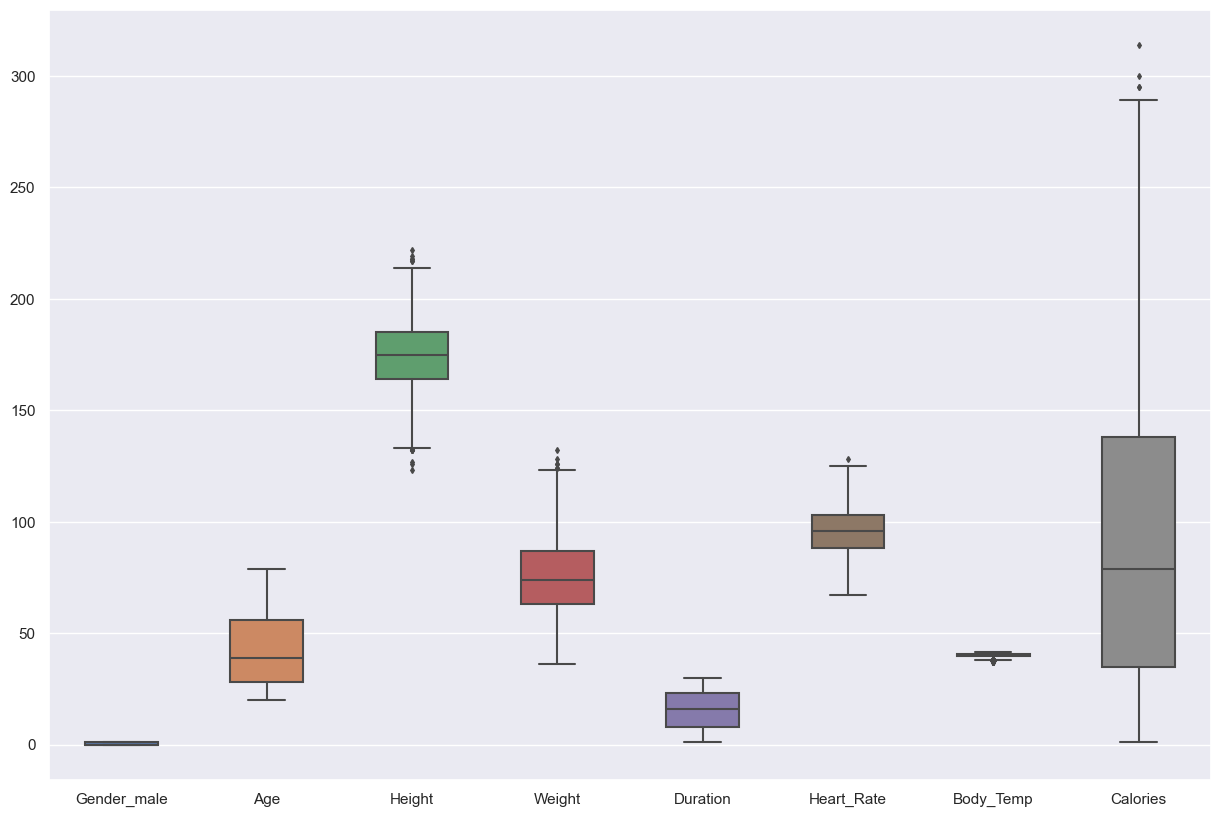

In [69]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, width=0.5, fliersize=3, ax=ax)
plt.show()

In [70]:
plt.figure(figsize=(20, 15))
plotnumber = 1

<Figure size 2000x1500 with 0 Axes>

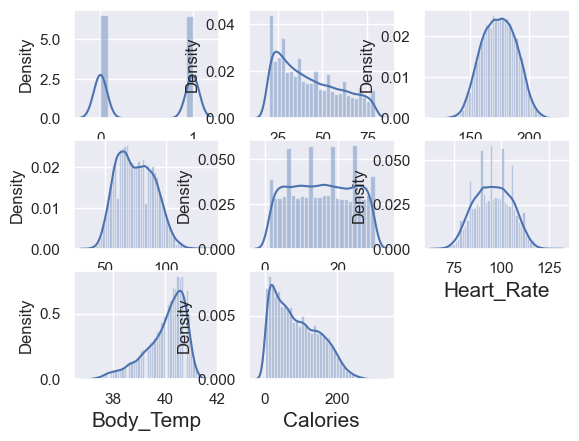

Index(['Gender_male', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')


In [71]:
for column in data:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=15)
    plotnumber += 1

plt.show()
print(data.columns)

In [72]:
X = data.drop(columns=["Calories"])
y = data["Calories"]
print(X.head())
print(y.head())

   Gender_male  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0         True   68   190.0    94.0      29.0       105.0       40.8
1        False   20   166.0    60.0      14.0        94.0       40.3
2         True   69   179.0    79.0       5.0        88.0       38.7
3        False   34   179.0    71.0      13.0       100.0       40.5
4        False   27   154.0    58.0      10.0        81.0       39.8
0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Shape of X Train: ", X_train.shape)
print("Shape of X Test: ", X_test.shape)
print("Shape of y Train: ", y_train.shape)
print("Shape of y Test: ", y_test.shape)

Shape of X Train:  (12000, 7)
Shape of X Test:  (3000, 7)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [74]:
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)
    print('Score : {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are: \n{}'.format(y_prediction))
    print('\n')

    r2_score = metrics.r2_score(y_test, y_prediction)
    print('R2 Score: {}'.format(r2_score))

    print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
    print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))
    
    sns.distplot(y_test - y_prediction)
    plt.show()

Score : 0.9995380557081355
Predictions are: 
[197.06581   70.867226 196.99498  ...  29.043041 104.09284   14.61472 ]


R2 Score: 0.9986863132331905
MAE: 1.5521575984954834
MSE: 5.2744122853837005
RMSE: 2.2966088664340956


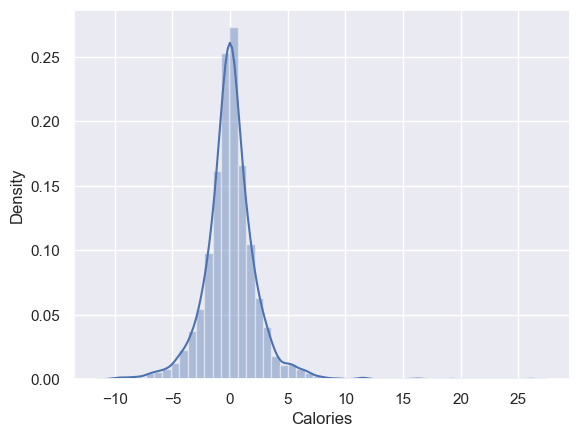

In [75]:
regression = XGBRegressor()
predict(regression)


In [76]:
# Saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))


Score : 0.967592555473578
Predictions are: 
[198.81182363  80.43555305 194.40940033 ...  22.14745631 118.63504926
 -11.98134672]


R2 Score: 0.9655977245826504
MAE: 8.479071745987953
MSE: 138.12408611460893
RMSE: 11.752620393538155


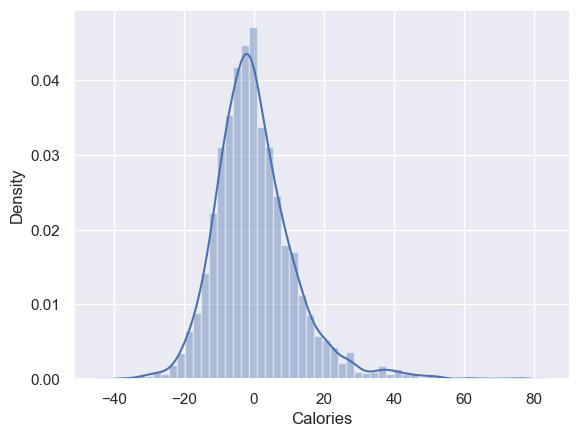

Score : 1.0
Predictions are: 
[194.  75. 204. ...  30. 112.  13.]


R2 Score: 0.9925510434329455
MAE: 3.4846666666666666
MSE: 29.907333333333334
RMSE: 5.46875976189605


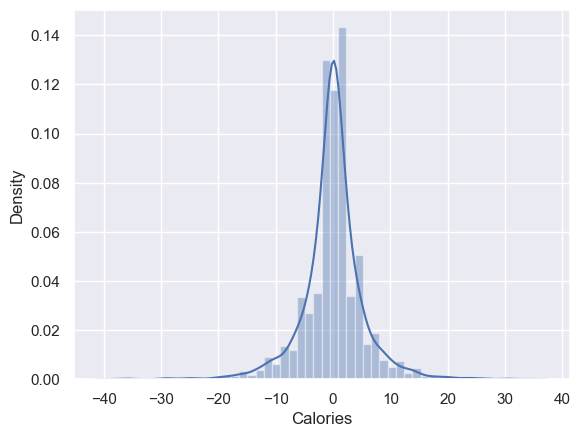

Score : 0.9996798244380722
Predictions are: 
[197.04  66.95 197.5  ...  27.73 111.51  14.03]


R2 Score: 0.9976161760476128
MAE: 1.8262966666666665
MSE: 9.570980433333332
RMSE: 3.0937001201366194


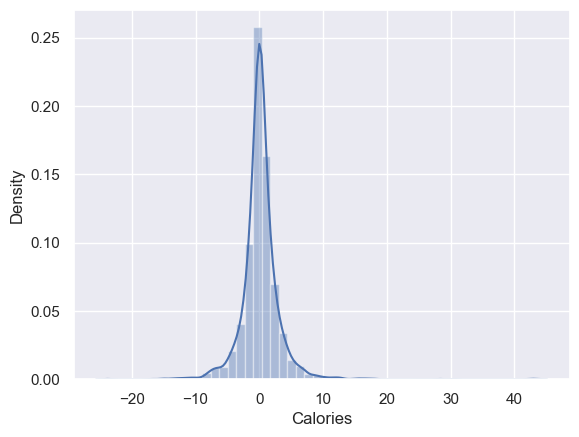

In [77]:
predict(LinearRegression())
predict(DecisionTreeRegressor())
predict(RandomForestRegressor())